# Video maker for the pyOrbit simulations 

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
# matplotlib.use("Agg")

import sys
sys.path.append('/Users/esenes/cernbox/PS-analysis-tools')
sys.path.append('/eos/user/e/esenes/PS-analysis-tools')
import eSimTools as est


%matplotlib inline

In [131]:
fpath = '/afs/cern.ch/work/e/esenes/simulations/bump_pyOrbit_test/scripts_bump/'
fpath = '/afs/cern.ch/work/e/esenes/tmp/'

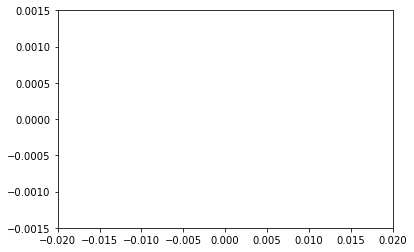

0


IOError: [Errno 2] No such file or directory: '/afs/cern.ch/work/e/esenes/simulations/bump_pyOrbit_test/scripts_bump/Turn_00000.dat'

In [33]:
# parameters
fileNum = 5000

# create the video object
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='PS_injection_bump', artist='Eugenio Senes',
                comment='Test1')
writer = FFMpegWriter(fps=15, metadata=metadata)

#plot setup
fig, ax = plt.subplots(1)

line, = plt.plot([],[],'.')
plt.xlim(-2e-2,2e-2)
plt.ylim(-1.5e-3,1.5e-3)
plt.show()

fig.tight_layout()


# X phase space
with writer.saving(fig, "PS_bump_x.mp4",100):
    for i in range(fileNum):
        print(i)
        fileContent = np.loadtxt(fpath+'Turn_'+str(i).zfill(5)+'.dat',skiprows=16)
        line.set_xdata(fileContent[:,0]) #x
        line.set_ydata(fileContent[:,1]) #px
        plt.draw()
        writer.grab_frame()
        
# Y phase space
#plot setup
fig, ax = plt.subplots(1)

line, = plt.plot([],[],'.')
plt.xlim(-2e-2,2e-2)
plt.ylim(-1.5e-3,1.5e-3)
plt.show()

fig.tight_layout()

with writer.saving(fig, "PS_bump_y.mp4",100):
    for i in range(fileNum):
        print(i)
        fileContent = np.loadtxt(fpath+'Turn_'+str(i).zfill(5)+'.dat',skiprows=16)
        line.set_xdata(fileContent[:,2]) #y
        line.set_ydata(fileContent[:,3]) #py
        plt.draw()
        writer.grab_frame()       
        
# Z phase space
#plot setup
fig, ax = plt.subplots(1)

line, = plt.plot([],[],'.')
plt.xlim(-0.6,.1)
plt.ylim(-.1e-6,.1e-6)
plt.show()

fig.tight_layout()
with writer.saving(fig, "PS_bump_z.mp4",100):
    for i in range(fileNum):
        print(i)
        fileContent = np.loadtxt(fpath+'Turn_'+str(i).zfill(5)+'.dat',skiprows=16)
        line.set_xdata(fileContent[:,4]) #z
        line.set_ydata(fileContent[:,5]) #dz
        plt.draw()
        writer.grab_frame()
        

In [132]:
fileNum = 1500

In [135]:
def beamSigma(y):
    return np.sqrt(np.sum((y - np.mean(y))**2)/(len(y)-1))

emix = np.empty([fileNum])
sigx = np.empty([fileNum])
emiy = np.empty([fileNum])
sigy = np.empty([fileNum])

z_mean = np.empty([fileNum])
z_std = np.empty([fileNum])

# X phase space
for i in range(fileNum):
    fileContent = np.loadtxt(fpath+'Turn_'+str(i).zfill(5)+'.dat',skiprows=16)
    x = fileContent[:,0] #x
    xp = fileContent[:,1] #px
    y = fileContent[:,2] #y
    yp = fileContent[:,3] #py
    z = fileContent[:,4] #y
    dE = fileContent[:,5] #py
    emix[i] = est.RMSStatisticalEmittance(x,xp)
    sigx[i] = np.std(x)
    emiy[i] = est.RMSStatisticalEmittance(y,yp)
    sigy[i] = np.std(y)
    z_mean[i] = np.mean(z)
    z_std[i] = np.std(z)
    if np.mod(i,10)==0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230


IOError: [Errno 60] Operation timed out

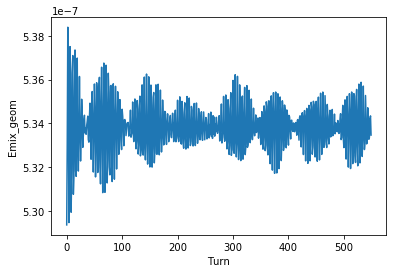

In [127]:
plt.plot(emix[:])
# plt.xlim(0,500)
# plt.ylim(5.33e-7,5.36e-7)
plt.ylabel('Emix_geom')
plt.xlabel('Turn')

In [128]:
emix.mean()

5.3383598849025756e-07

In [129]:
emix[0]*2.28267055562

1.2083309581577241e-06

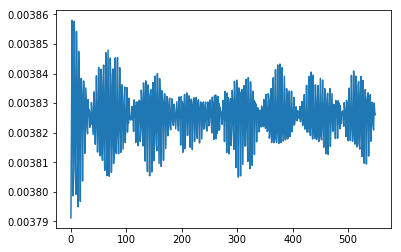

In [124]:
plt.plot(sigx)
# plt.xlim(0,500)

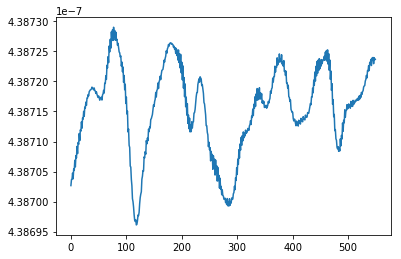

In [117]:
plt.plot(emiy[:])

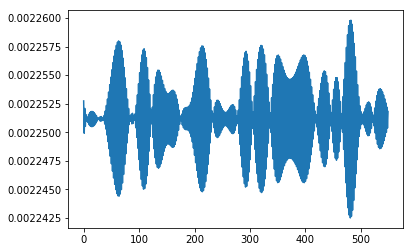

In [118]:
plt.plot(sigy)
# plt.xlim(0,500)

In [119]:
emiy[0]*2.28267055562

1.0014136542011943e-06